# $CL_{s}$ method

**References:**
- [CLs method (particle physics) - Wikipedia article](https://en.wikipedia.org/wiki/CLs_method_(particle_physics))
- [Alexander L. Read: Presentation of search results: The CL(s) technique](http://inspirehep.net/record/599622?ln=en)
- [Thomas Junk: Confidence Level Computation for Combining Searches with Small Statistics](https://arxiv.org/abs/hep-ex/9902006)
- [ATLAS Stat Forum 5/7/2011: The CLs method: information for conference speakers](https://www.pp.rhul.ac.uk/~cowan/stat/cls/CLsInfo.ps)

\begin{equation}
    CL_{s} = \frac{1}{1-p_{b}} p_{s+b}
\end{equation}

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import hepstat as hs
from parameter_estimation import confidence_interval as ci
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Common

In [2]:
nsamples = 10000
alpha = 0.05
bkg = 5

### $H_{b}$

In [3]:
lambda_Hb = bkg

In [4]:
n_Hb = scipy.stats.poisson.rvs(mu=lambda_Hb, size=nsamples)

### $H_{s+b}$

In [5]:
sig = 2

In [6]:
lambda_Hsb = bkg + sig

In [7]:
n_Hsb = scipy.stats.poisson.rvs(mu=lambda_Hsb, size=nsamples)

### Distributions of the observed number of events

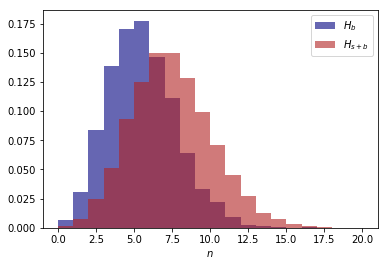

In [8]:
fig, ax = plt.subplots()
bins = np.linspace(0.0, 20, 21)
ax.hist(n_Hb,  bins, density=True, color='navy',      alpha=0.6, label=r'$H_{b}$')
ax.hist(n_Hsb, bins, density=True, color='firebrick', alpha=0.6, label=r'$H_{s+b}$')
ax.set_xlabel('$n$')
ax.legend()

## Test statistic 

Test statistics we use is simply the number of events observed: $n_{obs}$

\begin{equation}
    p_{b}
    =
    1 - CDF_{Poi(\lambda)}(n_{obs})
\end{equation}

\begin{equation}
    p_{s+b}
    =
    CDF_{Poi(\lambda)}(n_{obs})
\end{equation}

In [9]:
p_b  = 1.0-scipy.stats.poisson.cdf(n_Hb, mu=lambda_Hb)
p_sb = 1.0-scipy.stats.poisson.cdf(n_Hsb, mu=lambda_Hb)

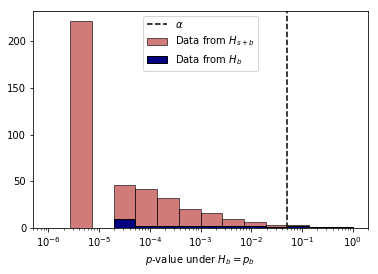

In [10]:
fig, ax = plt.subplots()
bins = np.logspace(-6, 0, 15)
ax.hist(p_sb, color='firebrick', density=True, bins=bins, edgecolor='k', alpha=0.6, label=r'Data from $H_{s+b}$')
ax.hist(p_b, color='navy', density=True, bins=bins, edgecolor='k', alpha=1.0, label=r'Data from $H_{b}$')
ax.set_xlabel('$p$-value under $H_{b} = p_{b}$ ')
ax.axvline(alpha, linestyle='--', c='k', label=r'$\alpha$')
ax.set_xscale('log')
ax.legend()

## Confidence intervals

In [11]:
CI_bounds_Hb = np.array([hs.calc_CI_bounds(n, bkg=bkg) for n in n_Hb])
CI_bounds_Hsb = np.array([hs.calc_CI_bounds(n, bkg=bkg) for n in n_Hsb])
experiments_Hb = np.c_[n_Hb, CI_bounds_Hb]
experiments_Hsb = np.c_[n_Hsb, CI_bounds_Hsb]

### Confidence intervals on $\lambda$ using data generated from the background only model

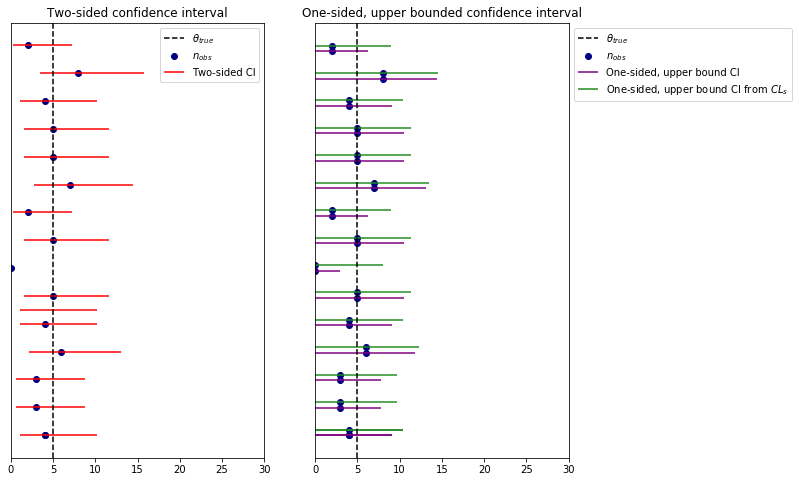

In [12]:
fig, ax = hs.show_confidence_intervals_with_CLs(experiments_Hb[:15], theta_true=bkg)

In [13]:
n_low  = np.percentile(experiments_Hb[:,0], 1)
n_high = np.percentile(experiments_Hb[:,0], 99)

In [14]:
downward_fluctuations = experiments_Hb[np.where((experiments_Hb[:,0] <= n_low))]
upward_fluctuations = experiments_Hb[np.where((experiments_Hb[:,0] >= n_high))]

Downward fluctuations

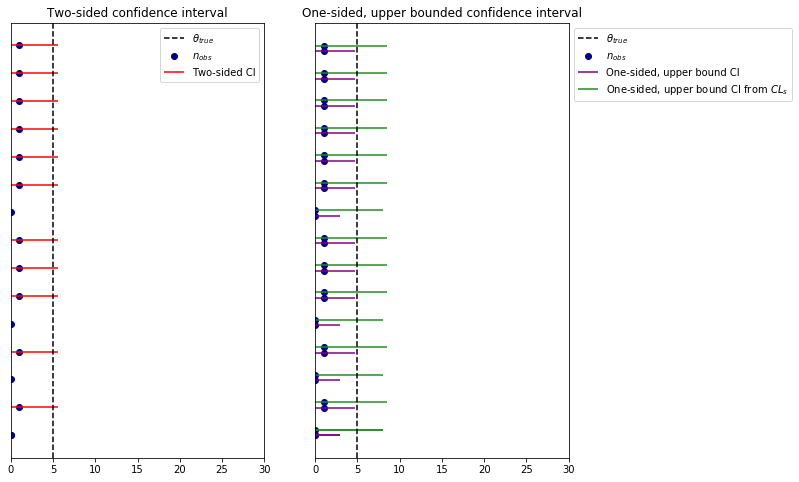

In [15]:
fig, ax = hs.show_confidence_intervals_with_CLs(downward_fluctuations[:15], theta_true=bkg)

$n_{obs} = 0$

In [16]:
experiments_Hb[np.where((experiments_Hb[:,0] == 0))][0]

array([ 0.        ,         nan,  3.68887945,  2.99573227,  7.99573227])

In [17]:
ci.poisson_upper_CLs(0, bkg=bkg, alpha=0.05)

7.995732273554105

In [18]:
1.0 - scipy.stats.poisson.cdf(k=0, mu=bkg)

0.99326205300091452

Upward fluctuations

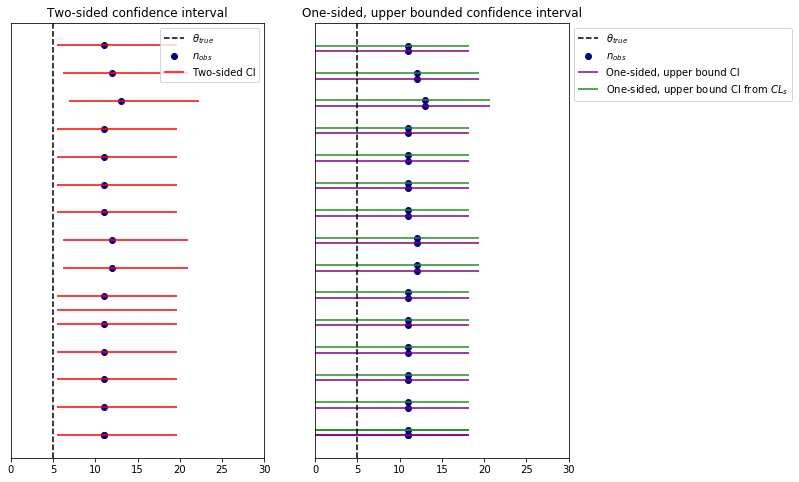

In [19]:
fig, ax = hs.show_confidence_intervals_with_CLs(upward_fluctuations[:15], theta_true=bkg)

### Confidence intervals on $\lambda$ using data generated from the signal+background model

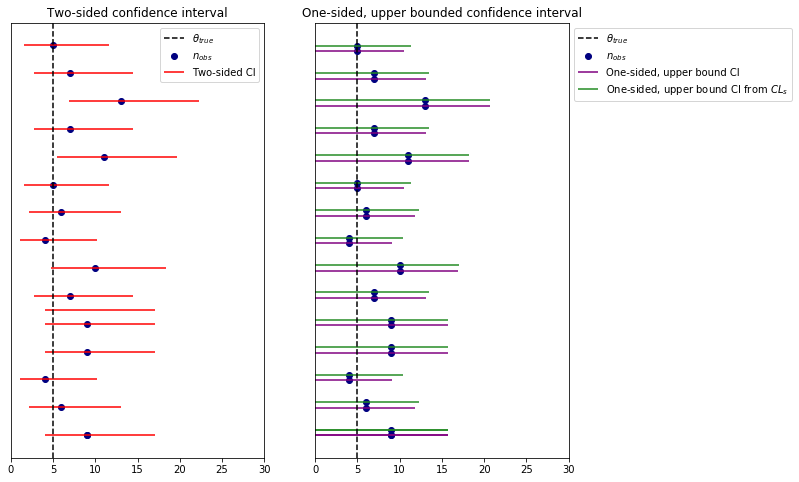

In [20]:
fig, ax = hs.show_confidence_intervals_with_CLs(experiments_Hsb[:15], theta_true=bkg)

## Consistency checks

### $\lambda^{U.L.}_{CL_{s}(\alpha)} \approx \lambda^{U.L.}_{CL_{s+b}(\alpha/2)}$  in case $n_{obs} = b$

In [21]:
bkg = 10
n_obs = 10
alpha = 0.05

In [22]:
pb = 1.0 - scipy.stats.poisson.cdf(n_obs, mu=bkg)
pb

0.41696024980701485

In [23]:
ci.poisson_upper(n_obs=n_obs, alpha=alpha/2)

18.390356042017771

In [24]:
ci.poisson_upper(n_obs=n_obs, alpha=alpha*(1-pb))

18.082529447368749

In [25]:
ci.poisson_upper_CLs(n_obs=n_obs, bkg=bkg, alpha=alpha)

18.082529447368749